<a href="https://colab.research.google.com/github/m0zzarella/Fundus-Imaging/blob/main/EigenEYE_Notebook_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [31]:
'''resize images and take green channel'''
def resize_images(folder_path, output_size=(128, 128)):
    resized_images = []
    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)

        #print(f"Resizing: {folder_path}/{filename}")

        img = cv2.imread(img_path)
        green_channel = img[:, :, 1]
        img_resized = cv2.resize(green_channel, output_size)

        resized_images.append(img_resized)

    return resized_images

In [3]:
'''mean eigenEYES'''
def mean_eye(images):
    mean_img = np.mean(images, axis=0)
    return mean_img.astype(np.uint8)

In [57]:
import numpy as np
from sklearn.decomposition import IncrementalPCA

def calculate_eigeneyes(data_matrix):

    n_components = 10

    print("Calculating eigeneyes using IncrementalPCA...")


    ipca = IncrementalPCA(n_components=n_components)


    batch_size = 100
    for i in range(0, data_matrix.shape[1], batch_size):
        print(f"Processing batch {i // batch_size + 1}...")
        batch = data_matrix[:, i:i+batch_size]
        ipca.partial_fit(batch.T)

    print("EigenEYE calculation completed.")

    eigenvalues = ipca.explained_variance_
    print("Eigenvalues:", eigenvalues)

    plt.figure(figsize=(8, 5))
    plt.bar(range(1, len(eigenvalues) + 1), eigenvalues, alpha=0.8)
    plt.title("Distribution of Eigenvalues")
    plt.xlabel("Principal Components")
    plt.ylabel("Eigenvalue")
    plt.show()

    return ipca.components_.T



In [56]:
def visualize_projections(folder_path, mean_face_img, eigeneyes):
    images = resize_images(folder_path)
    flattened_images = np.array([img.flatten() for img in images])

    projections = np.dot(flattened_images - mean_face_img.flatten(), eigeneyes)


    plt.figure(figsize=(15, 8))
    for i in range(10):
        plt.subplot(2, 5, i+1)
        plt.hist(projections[:, i], bins=20, color='blue', alpha=0.7, edgecolor='black')
        plt.title(f"EigenEYE {i+1}")

    plt.suptitle(f"Projections onto EigenEYE of: {os.path.basename(folder_path)}")
    plt.show()


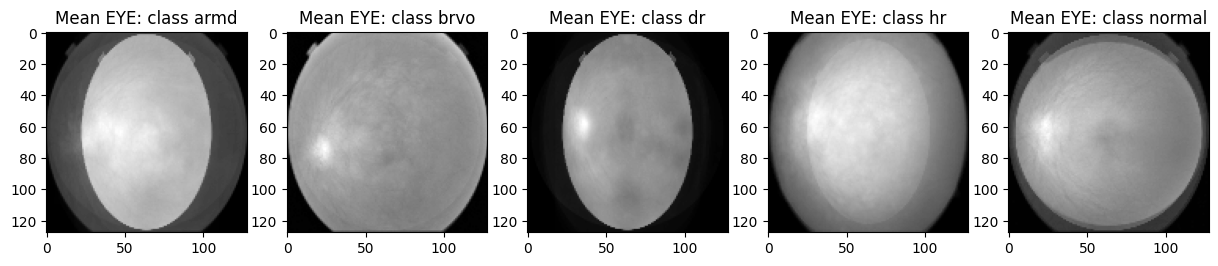

In [35]:
data_matrix = []
mean_faces = []


folder_names = ["armd", "brvo", "dr", "hr", "normal"]

fig, axs = plt.subplots(1, len(folder_names), figsize=(15, 3))

for i, folder_name in enumerate(folder_names):
    folder_path = f"/content/drive/MyDrive/Eigen_Eyes/{folder_name}"
    resized_images = resize_images(folder_path)

    '''display the mean eyes'''
    mean_img = mean_eye(resized_images)
    axs[i].imshow(mean_img, cmap='gray')
    axs[i].set_title(f"Mean EYE: class {folder_name}")

    for img in resized_images:
        img_flat = img.flatten()
        data_matrix.append(img_flat)

    mean_faces.append(mean_img)

plt.show()

Calculating eigenfaces using IncrementalPCA...
Processing batch 1...
Processing batch 2...
Processing batch 3...
Eigenface calculation completed.
Eigenvalues: [6788935.1115635  4818425.93703091 1089321.85917585  621134.57585547
  539308.9968965   395750.898597    238049.67438943  166056.30016807
  131951.04729237  112282.32854487]


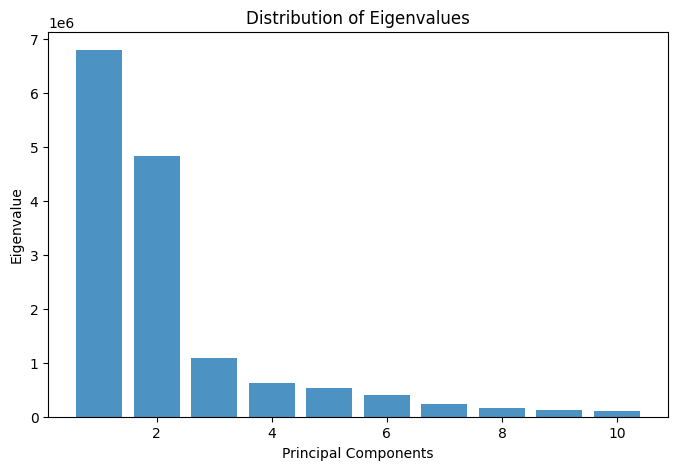

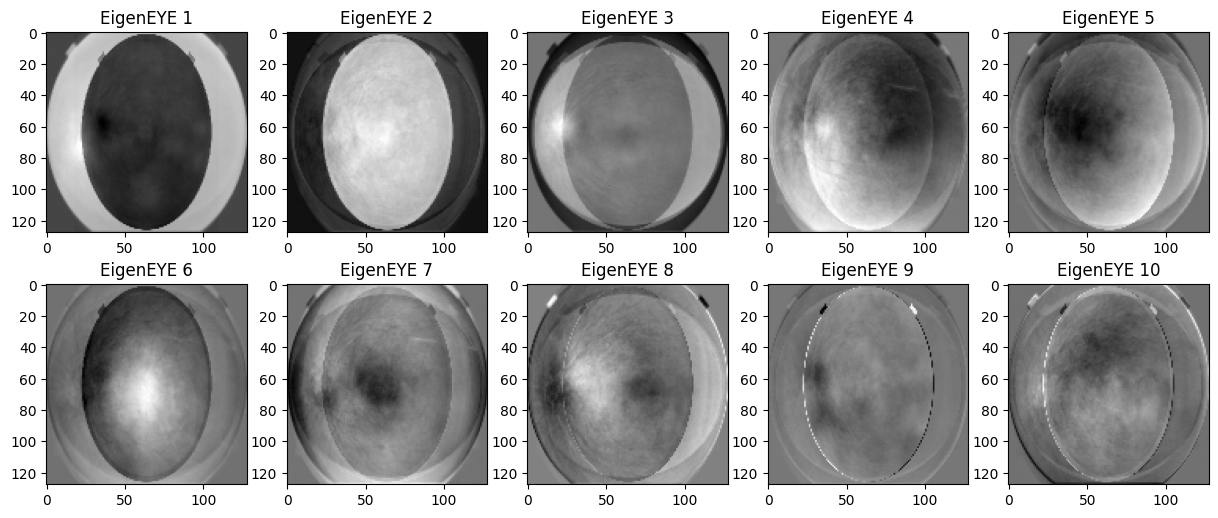

In [19]:
data_matrix = np.array(data_matrix).T
eigeneyes = calculate_eigeneyes(data_matrix)

fig, axs_eigen = plt.subplots(2, 5, figsize=(15, 6))

for i in range(2):
    for j in range(5):
        idx = i * 5 + j
        eigeneye_img = eigeneyes[:, idx].reshape(128, 128)
        axs_eigen[i, j].imshow(eigeneye_img, cmap='gray')
        axs_eigen[i, j].set_title(f"EigenEYE {idx + 1}")

plt.show()

Calculating eigeneyes using IncrementalPCA...
Processing batch 1...


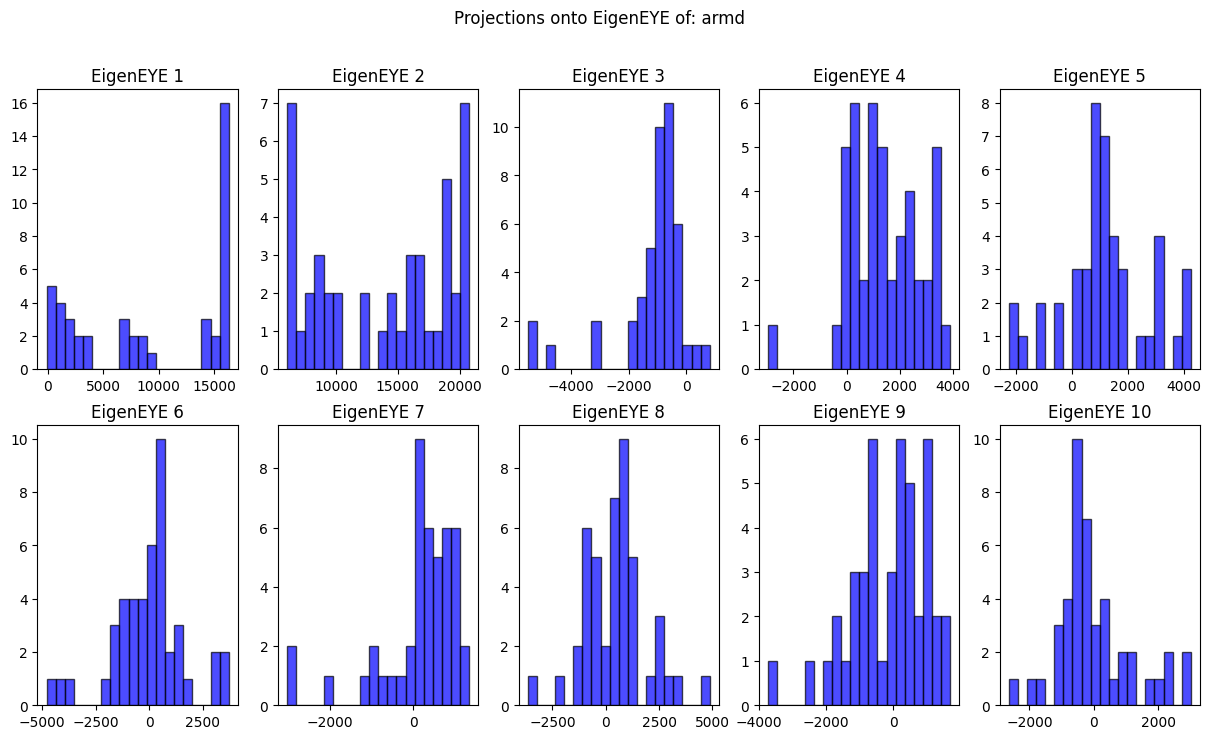

Calculating eigeneyes using IncrementalPCA...
Processing batch 1...


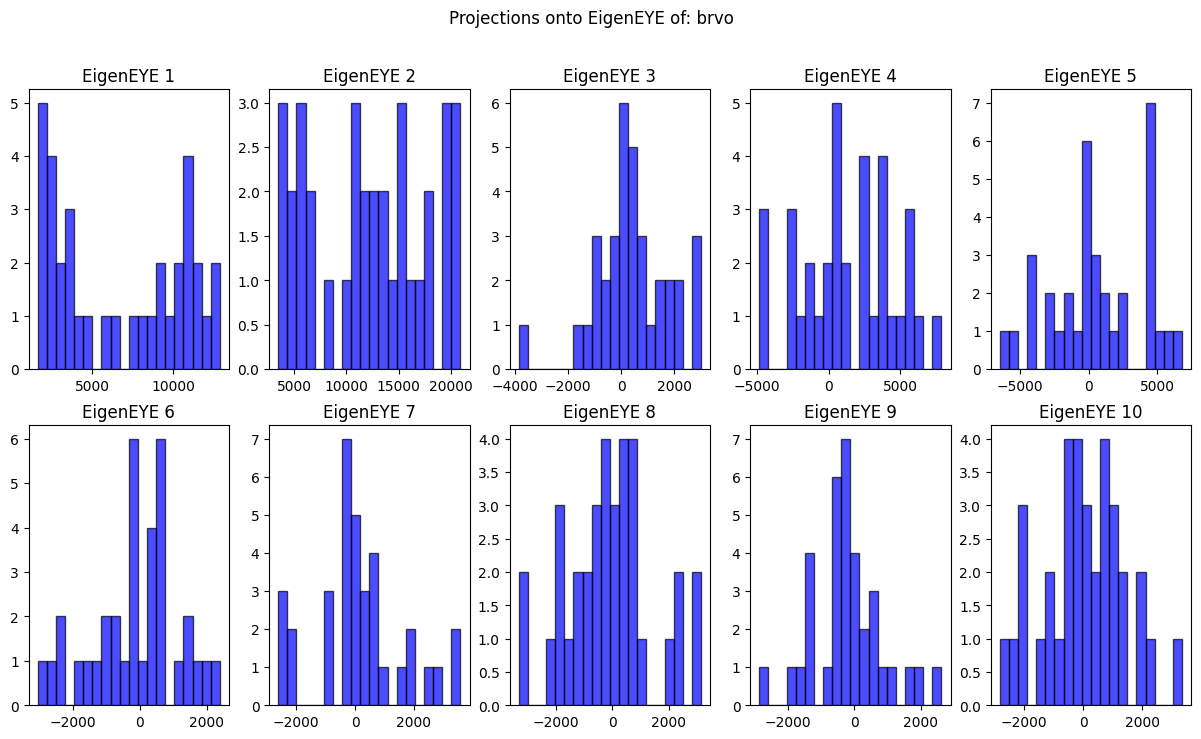

Calculating eigeneyes using IncrementalPCA...
Processing batch 1...


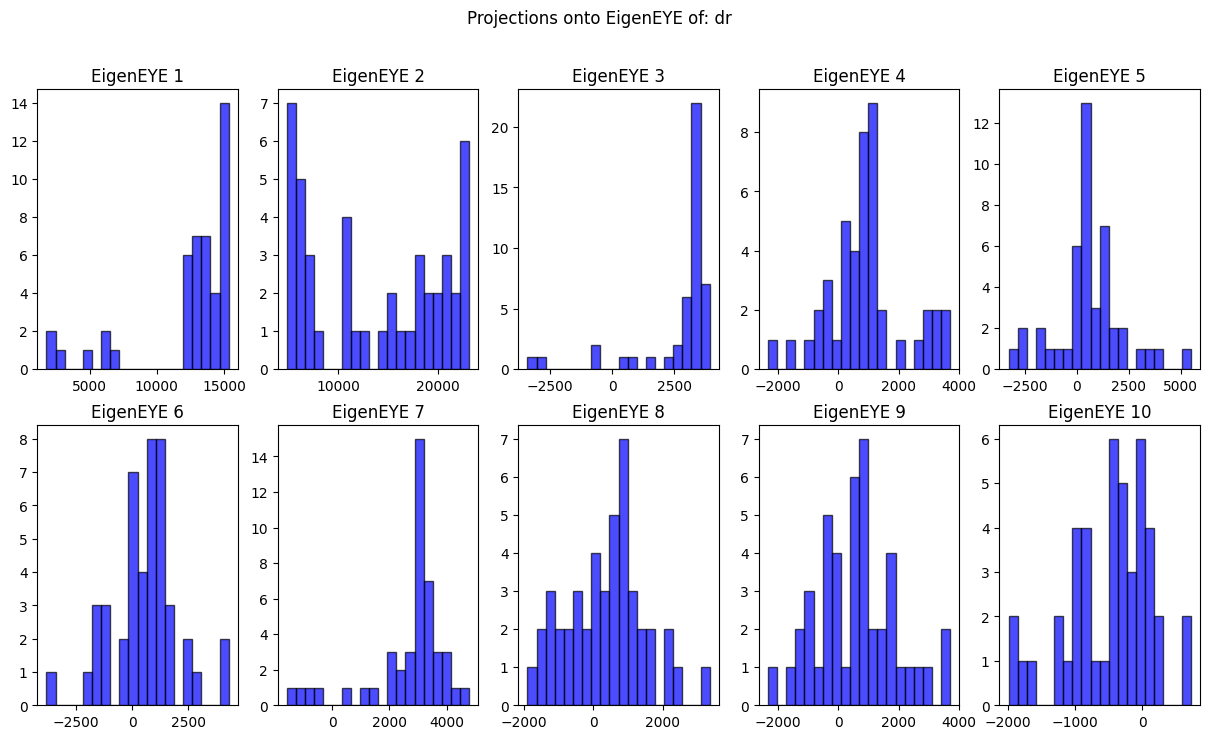

Calculating eigeneyes using IncrementalPCA...
Processing batch 1...


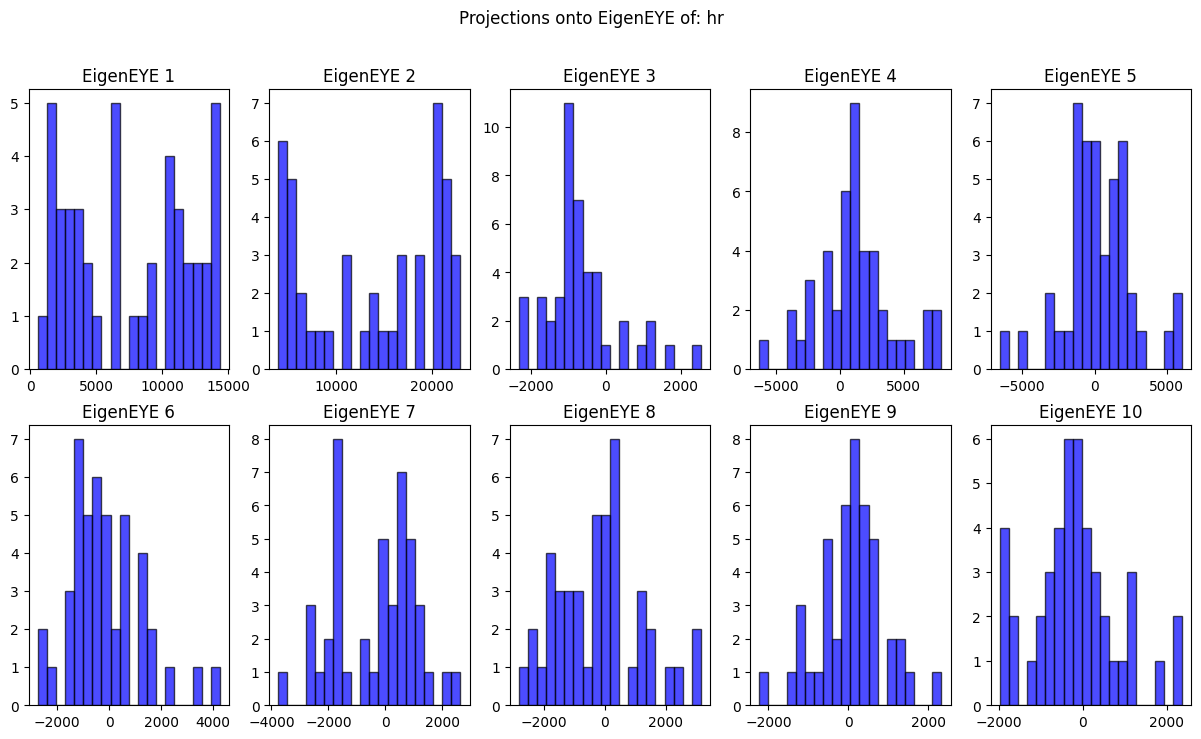

Calculating eigeneyes using IncrementalPCA...
Processing batch 1...


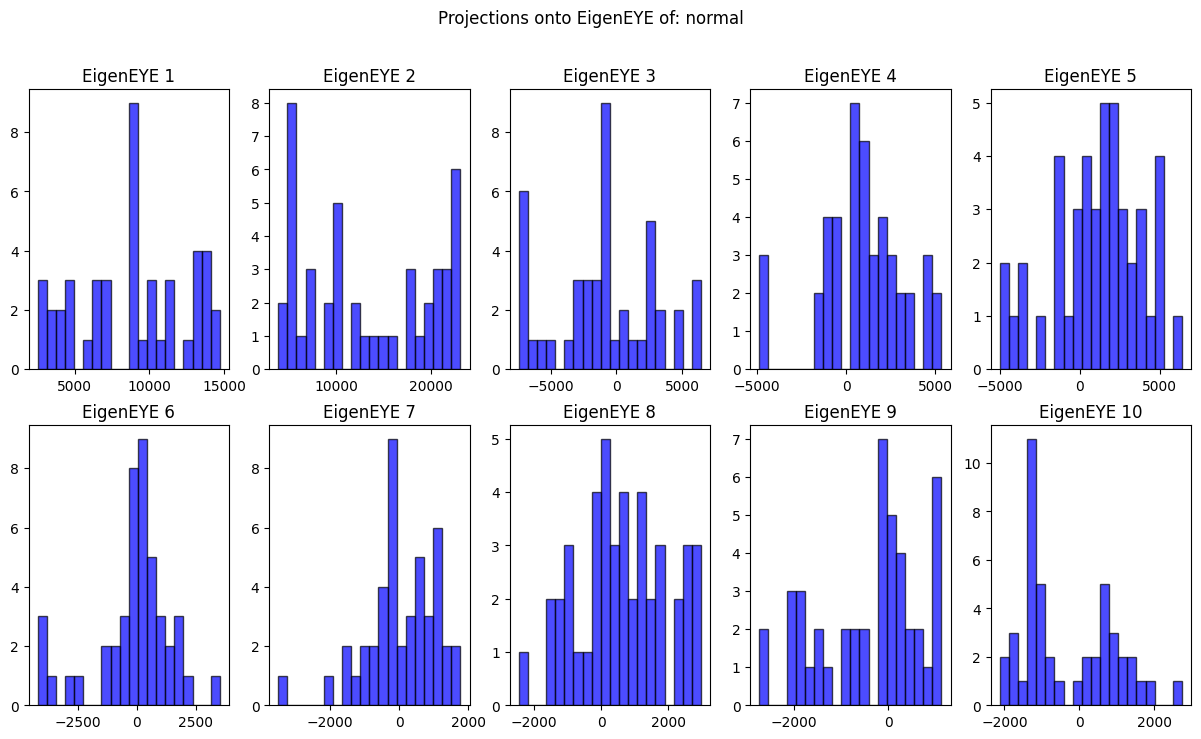

In [58]:
'''projection of eigeneyes'''

def for_visual(data_matrix):

    n_components = 10

    print("Calculating eigeneyes using IncrementalPCA...")


    ipca = IncrementalPCA(n_components=n_components)


    batch_size = 100
    for i in range(0, data_matrix.shape[1], batch_size):
        print(f"Processing batch {i // batch_size + 1}...")
        batch = data_matrix[:, i:i+batch_size]
        ipca.partial_fit(batch.T)

    return ipca.components_.T

folder_names = ["armd", "brvo", "dr", "hr", "normal"]

for folder_name in folder_names:
    folder_path = f"/content/drive/MyDrive/Eigen_Eyes/{folder_name}"
    resized_images = resize_images(folder_path)
    mean_img = mean_eye(resized_images)
    data_matrix = np.array([img.flatten() for img in resized_images]).T
    eigenfaces = for_visual(data_matrix)
    visualize_projections(folder_path, mean_img, eigeneyes)